In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class MultiArmedBandit:
    def __init__(self,start,end,k):
        self.k = k
        self.true_means = np.linspace(start,end,k)
        self.variance = 1

    def pull_arm(self,arm):
        if arm < 0 or arm >= self.k:
            raise ValueError("Invalid arm index")
        reward = np.random.normal(loc=self.true_means[arm], scale=np.sqrt(self.variance))
        return reward

In [24]:
class Greedy:
    def __init__(self, k):
        self.__name__ = "Greedy"
        self.k = k
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_arm(self):
        return np.argmax(self.q_values)

    def update_q_values(self, arm, reward):
        self.action_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm])/self.action_counts[arm]
        
    def reset(self):
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)
        

**Greedy Algorithm for Multi-Armed Bandits**
The `Greedy` class is an implementation of the Greedy algorithm for solving the multi-armed bandit problem. In this context, a multi-armed bandit is a metaphorical slot machine with k arms, each representing a different action or choice. The goal is to find the arm that maximizes the total reward over time.

Attributes:
- **k:** The number of arms in the bandit.
- **q_values:** An array representing the estimated values of each arm. Initialized with zeros.
- **action_counts:** An array tracking the number of times each arm has been selected.

Methods:
- **`select_arm()`:** Returns the index of the arm with the highest estimated value. This is the arm that the algorithm chooses to pull.
- **`update_q_values(arm, reward)`:** Updates the estimated value of the chosen arm based on the received reward. It employs a incremental update rule, adjusting the estimate towards the observed reward.
- **`reset()`:** Resets the algorithm by reinitializing the q_values and action_counts arrays.



In [25]:
class EpsilonGreedy:
    def __init__(self, k, epsilon):
        self.__name__ = "EpsilonGreedy"
        self.k = k
        self.const = epsilon
        self.epsilon = epsilon
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)  # Explore
        else:
            return np.argmax(self.q_values)  # Exploit

    def update_q_values(self, arm, reward):
        self.action_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.action_counts[arm]
        
    def reset(self):
        self.epsilon = self.const
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)
        

**Epsilon-Greedy Algorithm for Multi-Armed Bandits**
The `EpsilonGreedy` class is an implementation of the Epsilon-Greedy algorithm for solving the multi-armed bandit problem. This algorithm balances exploration and exploitation by introducing a parameter, epsilon, which determines the probability of exploration in each iteration.

Attributes:
- **k:** The number of arms in the bandit.
- **epsilon:** The exploration-exploitation trade-off parameter.
- **q_values:** An array representing the estimated values of each arm. Initialized with zeros.
- **action_counts:** An array tracking the number of times each arm has been selected.



In [26]:
class EpsilonGreedyDecay:
    def __init__(self, k, initial_epsilon, decay_rate = 0.999):
        self.__name__ = "EpsilonGreedyDecay"
        self.k = k
        self.const1 = initial_epsilon
        self.const2 = decay_rate
        self.epsilon = initial_epsilon
        self.decay_rate = decay_rate
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)  # Explore
        else:
            return np.argmax(self.q_values)  # Exploit

    def update_q_values(self, arm, reward):
        self.action_counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.action_counts[arm]
        self.epsilon  *= self.decay_rate 
        if self.epsilon < 0.001:
            self.epsilon = 0.001
            
    def reset(self):
        self.epsilon = self.const1
        self.decay_rate = self.const2
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)
        
        

**Epsilon-Greedy Algorithm with Decay for Multi-Armed Bandits**

The `EpsilonGreedyDecay` class extends the Epsilon-Greedy algorithm by introducing a decay mechanism for the exploration parameter (epsilon). This allows the algorithm to gradually reduce exploration over time, focusing more on exploitation as it learns about the environment.

Attributes:
- **k:** The number of arms in the bandit.
- **initial_epsilon:** The initial exploration-exploitation trade-off parameter.
- **decay_rate:** The rate at which epsilon decays over time. Defaults to 0.999.
- **epsilon:** The current exploration parameter.
- **q_values:** An array representing the estimated values of each arm. Initialized with zeros.
- **action_counts:** An array tracking the number of times each arm has been selected.


In [27]:
class UCB:
    def __init__(self,k,c):
        self.__name__ = "UCB"
        self.k = k
        self.c = c
        self.q_values = np.zeros(k)
        self.action_counts = np.zeros(k)
        self.total_counts = 0

    def select_arm(self):
        ucb_values = self.q_values + self.c * np.sqrt(2*np.log(self.total_counts + 1)/(self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_q_values(self, arm, reward):
        self.action_counts[arm] += 1
        self.total_counts += 1
        self.q_values[arm] += (reward - self.q_values[arm])/self.action_counts[arm]
        
    def reset(self):
        self.q_values = np.zeros(self.k)
        self.action_counts = np.zeros(self.k)
        self.total_counts = 0
        

**Upper Confidence Bound (UCB) Algorithm for Multi-Armed Bandits**

The `UCB` class implements the Upper Confidence Bound algorithm, a strategy for the multi-armed bandit problem that balances exploration and exploitation by considering uncertainty in the estimated values of each arm.

Attributes:
- **k:** The number of arms in the bandit.
- **c:** A positive constant controlling the level of exploration. Higher values of c lead to more exploration.
- **q_values:** An array representing the estimated values of each arm. Initialized with zeros.
- **action_counts:** An array tracking the number of times each arm has been selected.
- **total_counts:** The total number of arm pulls across all arms.

### UCB Equation:
<!-- insert ucb mathematical equation in markdown style in latex-->
latex code
$$ UCB = \bar{X}_j + \sqrt{\frac{2\ln{n}}{n_j}}$$

- In this equation, $\bar{X}_j$ represents the average reward obtained from arm j
- $n$ represents the total number of arm pulls
- $n_j$ represents the number of times arm j has been pulled. 
- The UCB value is calculated for each arm, and the arm with the highest UCB value is selected for pulling.




In [28]:
def run_bandit_algorithm(bandit,algorithm,rounds,num_times):

    if algorithm.__name__ == 'UCB': 
        ls = []
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            ls.append(reward)
        np.array(ls)
        
        rewards_per_round = []
        for i in range(num_times):
            track_reward = []
            for j in range(bandit.k,rounds):
                arm = algorithm.select_arm()
                reward = bandit.pull_arm(arm)
                algorithm.update_q_values(arm,reward)
                track_reward.append(reward)
            rewards_per_round.append(track_reward)
        rewards_per_round = np.array(rewards_per_round)
        return np.concatenate((ls,np.mean(rewards_per_round, axis=0)))

    # pure random exploaration
    ls = []
    for i in range(40):
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            ls.append(reward)
    np.array(ls)
    
    rewards_per_round = []
    for i in range(num_times):
        track_reward = []
        for j in range(40*bandit.k,rounds):
            arm = algorithm.select_arm()
            reward = bandit.pull_arm(arm)
            algorithm.update_q_values(arm,reward)
            track_reward.append(reward)
        rewards_per_round.append(track_reward)
    rewards_per_round = np.array(rewards_per_round)
    return np.concatenate((ls,np.mean(rewards_per_round, axis=0)))

def plot_average_rewards(bandit, algorithms, labels, num_times, rounds):
    plt.figure(figsize=(12, 6))
    
    for i, algorithm in enumerate(algorithms):
        average_rewards = run_bandit_algorithm(bandit, algorithm, rounds, num_times)
        plt.plot(np.arange(1, rounds + 1), average_rewards, label=labels[i])
        
    plt.title("Average Rewards Over Time")
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.show()

In [29]:
def run_bandit_pulls(bandit,algorithm,rounds):

    if algorithm.__name__ == 'UCB': 
        pulls = np.zeros(bandit.k)
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            pulls[j] += 1

        for j in range(bandit.k,rounds):
            arm = algorithm.select_arm()
            reward = bandit.pull_arm(arm)
            algorithm.update_q_values(arm,reward)
            pulls[arm] += 1
        return pulls
    
    pulls = np.zeros(bandit.k)
    for i in range(40):
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            pulls[j] += 1

    for j in range(40*bandit.k,rounds):
        arm = algorithm.select_arm()
        reward = bandit.pull_arm(arm)
        algorithm.update_q_values(arm,reward)
        pulls[arm] += 1
        
    return pulls

def plot_arm_pulls_histogram(bandit, algorithms,labels, rounds):
    plt.figure(figsize=(12, 6))

    bar_width = 0.06 
    bar_positions = np.linspace(1,10,bandit.k)

    for i, algorithm in enumerate(algorithms):
        arm_pulls = run_bandit_pulls(bandit,algorithm,rounds)
        plt.bar(bar_positions + i*bar_width, arm_pulls, width=bar_width, label=labels[i], alpha=0.7)

    plt.title(f"Number of Times Each Arm is Pulled in {rounds} rounds")
    plt.xlabel("Arm Index")
    plt.ylabel("Number of Pulls")
    plt.legend()
    plt.show()

In [30]:
def calculate_regret(bandit, algorithm, rounds, num_times):

    if algorithm.__name__ == 'UCB':  
        ls = []
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            ls.append(reward)
        np.array(ls)
        
        rewards_per_round = []
        for i in range(num_times):
            track_reward = []
            for j in range(bandit.k,rounds):
                arm = algorithm.select_arm()
                reward = bandit.pull_arm(arm)
                algorithm.update_q_values(arm,reward)
                track_reward.append(reward)
            rewards_per_round.append(track_reward)
        rewards_per_round = np.array(rewards_per_round)
        rewards_per_round = np.concatenate((ls,np.mean(rewards_per_round, axis=0)))
        sum = np.array([0.0])
        ls = []
        for i in range(len(rewards_per_round)):
            sum += rewards_per_round[i]
            ls.append(np.max(bandit.true_means)*(i+1) - sum)
        return ls

    ls = []
    for i in range(40):
        for j in range(bandit.k):
            reward = bandit.pull_arm(j)
            algorithm.update_q_values(j,reward)
            ls.append(reward)
    np.array(ls)
    
    rewards_per_round = []
    for i in range(num_times):
        track_reward = []
        for j in range(40*bandit.k,rounds):
            arm = algorithm.select_arm()
            reward = bandit.pull_arm(arm)
            algorithm.update_q_values(arm,reward)
            track_reward.append(reward)
        rewards_per_round.append(track_reward)
    rewards_per_round = np.array(rewards_per_round)
    rewards_per_round = np.concatenate((ls,np.mean(rewards_per_round, axis=0)))
    sum = np.array([0.0])
    ls = []
    for i in range(len(rewards_per_round)):
        sum += rewards_per_round[i]
        ls.append(np.max(bandit.true_means)*(i+1) - sum)
    return ls

def plot_average_regret(bandit,algorithms, labels, num_times, rounds):
    plt.figure(figsize=(12, 6))
    
    for i, algorithm in enumerate(algorithms):
        average_regret = calculate_regret(bandit, algorithm, rounds, num_times)
        plt.plot(np.arange(1, rounds + 1), average_regret, label=labels[i])

    plt.title("Average Regret Over Time")
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Regret")
    plt.legend()
    plt.show()

In [31]:
# Create bandit environment with 10 arms
num_arms = 10
bandit = MultiArmedBandit(5,10,num_arms)

In [32]:
# Initialize algorithms
greedy_algorithm = Greedy(num_arms)
epsilon_greedy_1 = EpsilonGreedy(num_arms, epsilon=0.1)
epsilon_greedy_2 = EpsilonGreedy(num_arms, epsilon=0.01)
epsilon_greedy_decay = EpsilonGreedyDecay(num_arms, initial_epsilon=1)
ucb_algorithm = UCB(num_arms, c=2)

In [33]:
algorithms = [greedy_algorithm, epsilon_greedy_1, epsilon_greedy_2 , epsilon_greedy_decay, ucb_algorithm]
labels = ["Greedy","Epsilon-Greedy (ε=0.1)", "Epsilon-Greedy (ε=0.01)", "Epsilon-Greedy-with-decay (ε=1)", "UCB"]

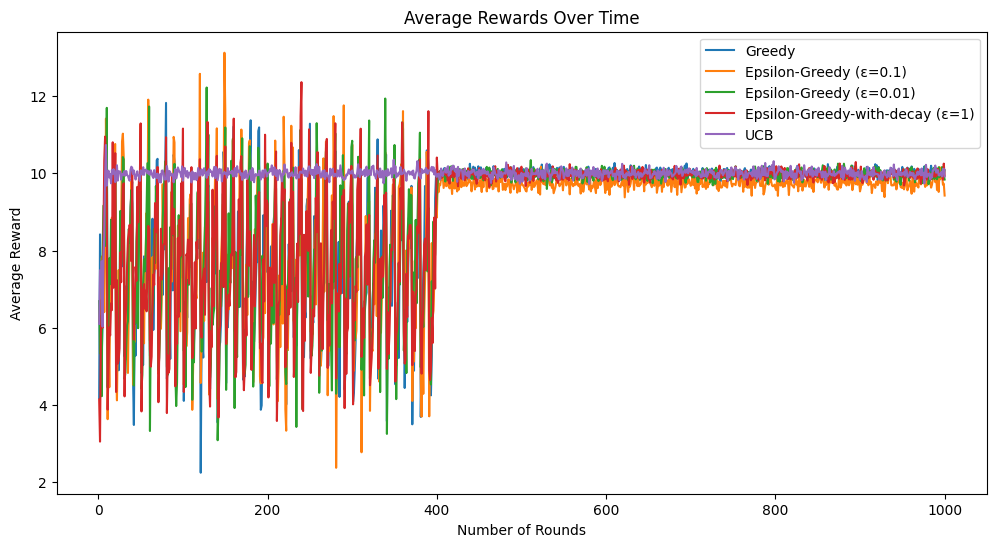

In [34]:
plot_average_rewards(bandit,algorithms,labels,num_times=100, rounds=1000)

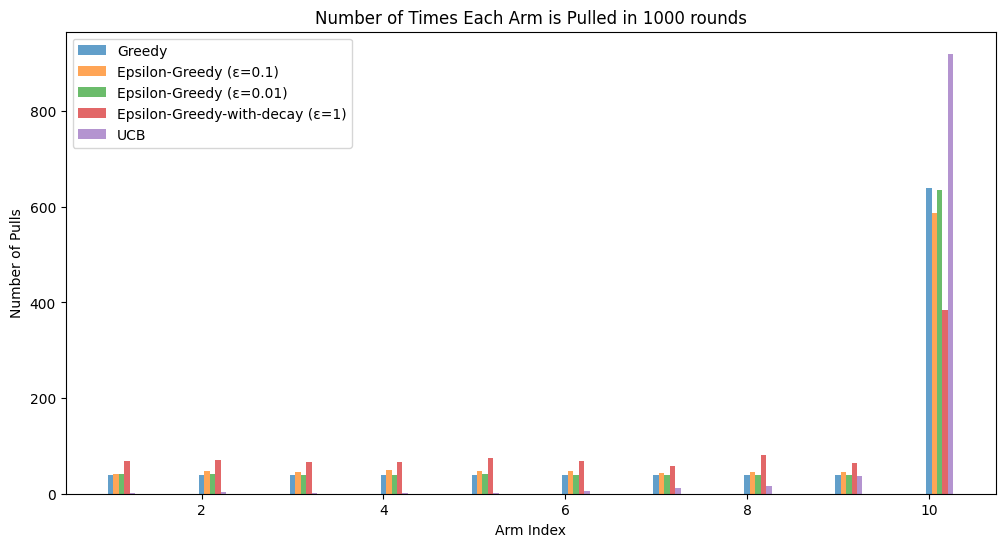

In [35]:
for alg in algorithms:
    alg.reset()
    
plot_arm_pulls_histogram(bandit,algorithms,labels,rounds=1000)

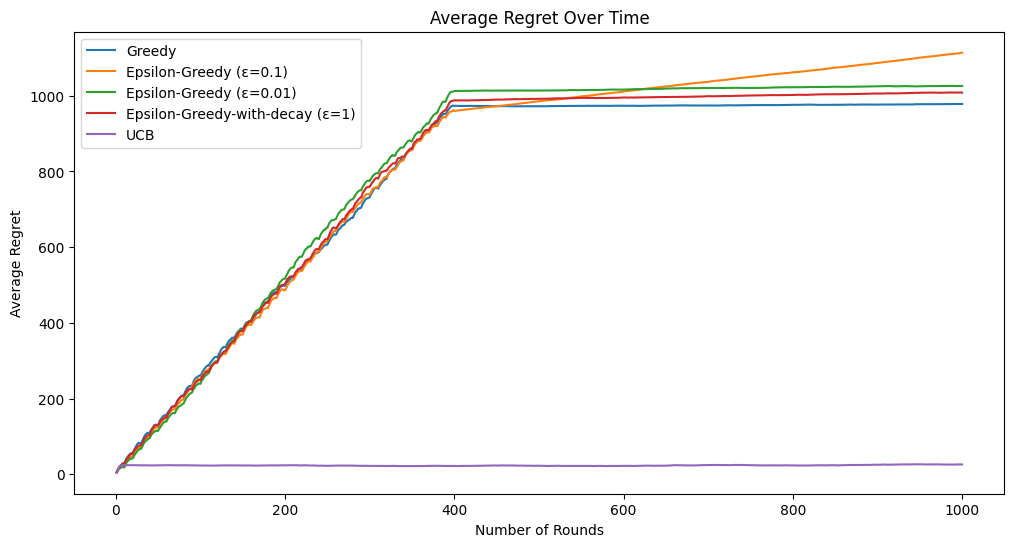

In [36]:
for alg in algorithms:
    alg.reset()

plot_average_regret(bandit,algorithms,labels,num_times=100, rounds=1000)

<p> We can see even though we explore randomly for 10 ucb performs very well also as the rewards are spaces far apart 
the greddy performs well but for complicated bandits environment this wont be the case </p>
<p>we have epsion gredy with decay in between epsilon greedy algorithms and ucb as initially it explores but after 
sufficint time it  explores very less and exploits more hence maxmizing the rewards</p>
<p>epsion greedy with 0.1 has high regret as in this case even though most algorithm find optimal by the time of 800 rounds it still explores more with 10% random pulls this is followed by epsilon greedy with 0.01 epsilon</p>

### when rewards are close

In [37]:
# Create bandit environment with 10 arms
num_arms = 10
bandit = MultiArmedBandit(1,2,num_arms)

In [38]:
# Initialize algorithms
greedy_algorithm = Greedy(num_arms)
epsilon_greedy_1 = EpsilonGreedy(num_arms, epsilon=0.1)
epsilon_greedy_2 = EpsilonGreedy(num_arms, epsilon=0.01)
epsilon_greedy_decay = EpsilonGreedyDecay(num_arms, initial_epsilon=1)
ucb_algorithm = UCB(num_arms, c=2)

In [39]:
algorithms = [greedy_algorithm, epsilon_greedy_1, epsilon_greedy_2 , epsilon_greedy_decay, ucb_algorithm]
labels = ["Greedy","Epsilon-Greedy (ε=0.1)", "Epsilon-Greedy (ε=0.01)", "Epsilon-Greedy-with-decay (ε=1)", "UCB"]

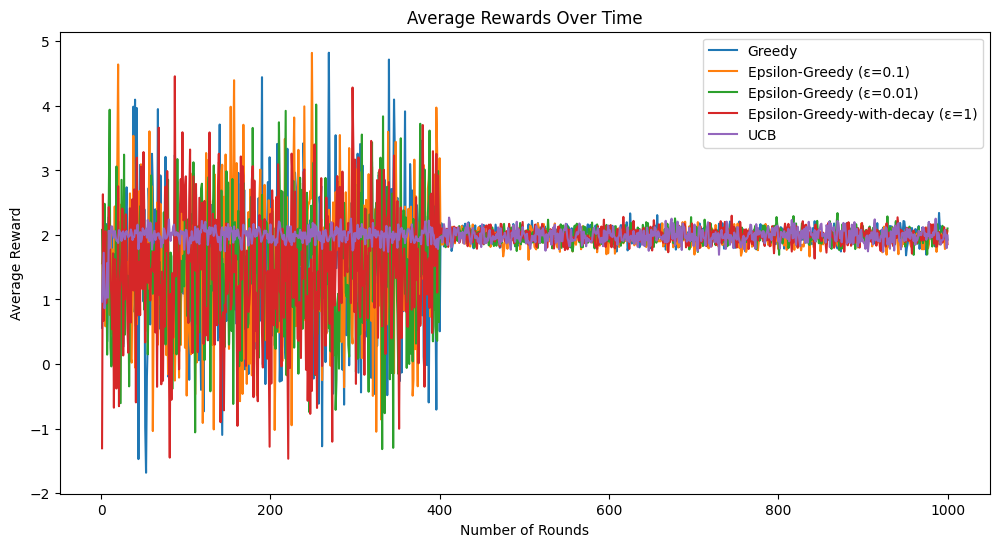

In [40]:
plot_average_rewards(bandit,algorithms,labels,num_times=100, rounds=1000)

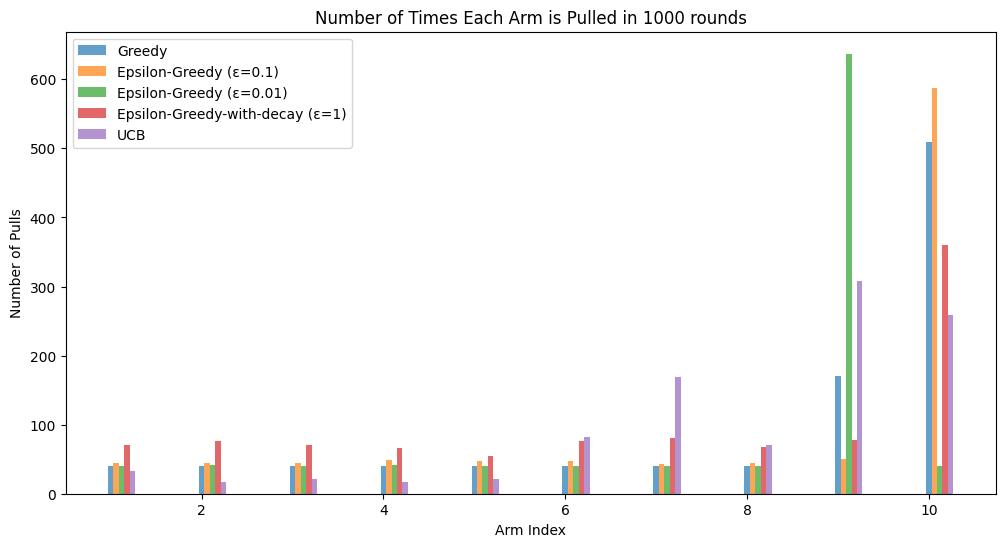

In [41]:
for alg in algorithms:
    alg.reset()
    
plot_arm_pulls_histogram(bandit,algorithms,labels,rounds=1000)

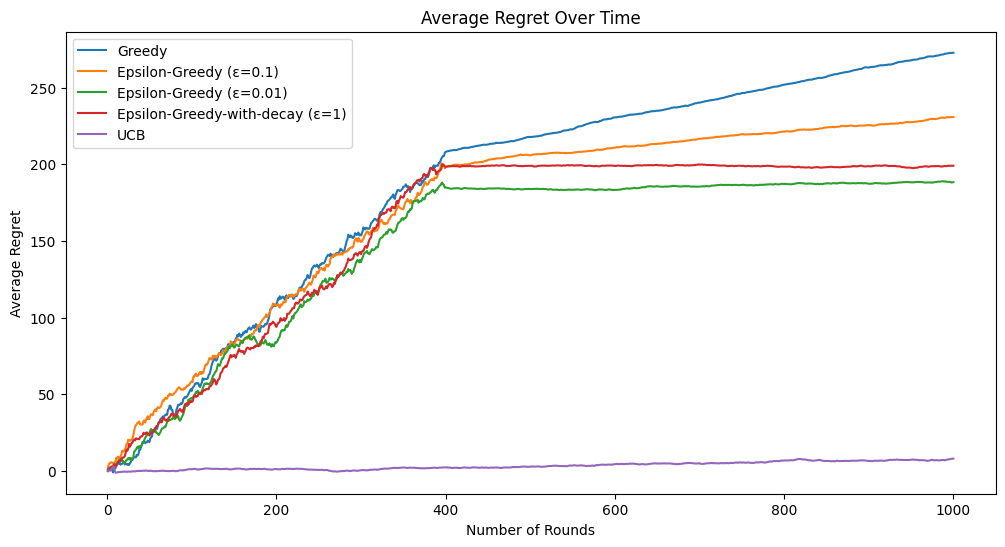

In [42]:
for alg in algorithms:
    alg.reset()

plot_average_regret(bandit,algorithms,labels,num_times=100, rounds=1000)

<p>As we said in prev case we see rewards are spaces sufficiently far enought for greedy to perform better 
but in this case as rewards are close enough that greedy cant pick the optimal during pure exploration phase</p>
<p>As always UCB performs well even with less exploaratins in the start it recognizes the best arm as rounds progresses</p>
<p>here epsilon greedy with 0.1 has higher than greedy epsilon with 0.01 epsilon because after the exploartion phase it still explores more but the other starts exploiting more with the information gathered</p>
<p>We see epsilon greedy with decay is in between epsion greedy 0.1 and 0.01 but as time increases we can see regret of 
this will  be less as by then bandits are explored completely and their rewards is not changing so once exploting dominated the regret improves significantly</p>